
#DATA 606 Final Project


---



# Breast Cancer Predection

---


## -Kurre Sai Chand

---


##### Breast Cancer is the most common cancer, and it has recently been a very highly reported skin cancer type. In the world of healthcare, Breast Cancer is a current hot-button issue. Our modern and lethargic lifestyle could be the main reason. This type of cancer can occur in both men and women. Still, as per scientific investigation, Women are 2X susceptible to Breast Cancer, so diagnosing cancer in early stages is essential. Based on an imaging procedure called Fine Needle Aspiration procedure, an expert will classify the cells as malignant or benign. But how can we diagnose breast cancer with machine learning? That's the question of the hour. With image processing techniques or manual measurements, cell characteristics are measured from Fine Needle aspiration images, and these characteristics will be used to classify the cells into Benign and Cancerous.

---


Loading the required libraries

In [1]:
#loading the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library
import matplotlib.pyplot as plt
import plotly.express as px

Loading the Data

In [2]:
#Loading the data from BreastCancer_Data.csv into a df Data Frame
df = pd.read_csv("BreastCancer_Data.csv",header = 0)
#Printing the first 5 columns to check the data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


To Know the data type and the null values we use df.info()

In [3]:
df.info() #to get information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Shape of data

In [4]:
# to Know the size of our data
df.shape

(569, 33)

Our data frame contains 569 rows and 33 columns

Column Names

In [5]:
# feature names as a list
col = df.columns       # .columns gives columns names in data
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


Statistical idea about data

In [6]:
#To know the numerical details like mean median mode min and max of the columns of data we use describe()
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Checking NULL values

In [7]:
df.isnull().values.any() # checking null values

True

True indicates that our data set has null values

To find number of NULL values in each column

In [8]:
df.isnull().sum() #number of null values in each column

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Unnamed: 32 is the column with all NULL values so droping the column from the data frame

In [9]:
df = df.drop("Unnamed: 32", axis=1) #Dropping Unnaned: 32 Column
#the deleted column is empty column

Checking whether any columns have the same value so that we drop extra column from the data frame

In [10]:
#checking whether any columns have the same value
for this_column in df.columns:
    if (df[this_column].nunique()==1):
        print(this_column)

Checking whether the id column is unique or not in order to drop extra rows

In [11]:
df['id'].nunique()

569

the count of nunique matches with total number of rows, so every ID is unique and no need to drop any row.

To get the categeorical details of "diagonsis" column

In [12]:
df['diagnosis'].nunique()

2

Basic observations:
 - Id is a unique field.
 - Unnamed: 32 is the empty column which is of no use, so we can drop that column.
 - Diagonsis Field contain only 2 values "M" and "B".
 - Data does not contain any null values.

Visualizations about our data

Box Plot for value counts of Malignant and Benign

In [13]:
y = df.diagnosis

# Create a DataFrame from your 'y' data
data = pd.DataFrame({'y': y})
# Define colors for each class
class_colors = {'M': 'red', 'B': 'blue'}

# Map the 'diagnosis' values to the corresponding colors
data['color'] = data['y'].map(class_colors)
# Create a bar plot using Plotly Express and specify colors
fig = px.bar(data['y'].value_counts().reset_index(), x='index', y='y', color='index', color_discrete_map=class_colors,
             labels={'index': 'Class', 'y': 'Count'}, title='Distribution of Classes')
fig.update_xaxes(categoryorder='total descending')  # Sort the categories by count
# Customize the appearance of the plot
fig.update_xaxes(title_text='Diagonsis')  # X-axis label
fig.update_yaxes(title_text='Count')  # Y-axis label
fig.update_layout(title='Box Plot for value counts of Malignant and Benign')  # Plot title
# Show the plot
fig.show()

Histogram of Radius Mean for Benign and Malignant Tumors

In [14]:
import plotly.express as px
import pandas as pd

# Convert diagnosis column to categorical for better plotting
df['diagnosis'] = pd.Categorical(df['diagnosis'])

# Map "M" to "Malignant" and "B" to "Benign" in the diagnosis column
df['diagnosis'] = df['diagnosis'].map({'M': 'Malignant', 'B': 'Benign'})

# Create a histogram using Plotly
fig = px.histogram(df, x="radius_mean", color="diagnosis", nbins=30,
                   color_discrete_sequence=['red', 'green'],
                   labels={"radius_mean": "Radius Mean Values", "count": "Frequency"},
                   title="Histogram of Radius Mean for Benign and Malignant Tumors",
                   opacity=0.5)

# Update legend labels
fig.update_traces(marker=dict(opacity=0.5), selector=dict(type='histogram'))
fig.update_layout(showlegend=True)

# Show the plot
fig.show()


Box Plot of Radius Mean and Texture Mean for Benign and Malignant Tumors

In [15]:
# Convert the data to long format using pandas.melt
melted_df = pd.melt(df, id_vars="diagnosis", value_vars=['radius_mean', 'texture_mean'])

# Create a box plot using Plotly Express
fig = px.box(melted_df, x="variable", y="value", color="diagnosis",
             labels={"variable": "Variable", "value": "Value"},
             title="Box Plot of Radius Mean and Texture Mean for Benign and Malignant Tumors")

# Show the plot
fig.show()

Violin plot for first 10 columns

In [16]:
# y includes our labels and x includes our features
y = df.diagnosis                          # M or B
list = ['id','diagnosis']
x = df.drop(list,axis = 1 )


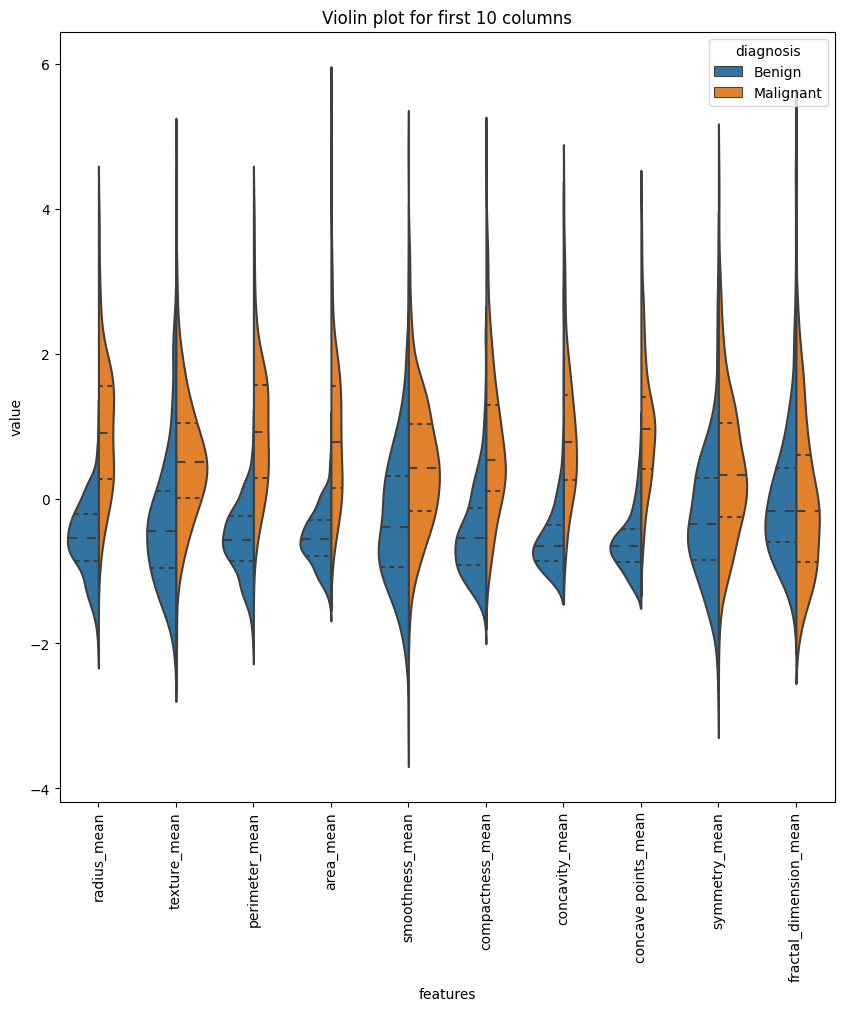

In [17]:
# first ten features
data_diagnosis = y
data = x
data_new = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_new.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
plt.title("Violin plot for first 10 columns")
plt.show()

texture_mean feature, median of the Malignant and Benign looks like separated so it can be good for classification. However, in fractal_dimension_mean feature, median of the Malignant and Benign does not looks like separated so it does not gives good information for classification.